<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/T1_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [2]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

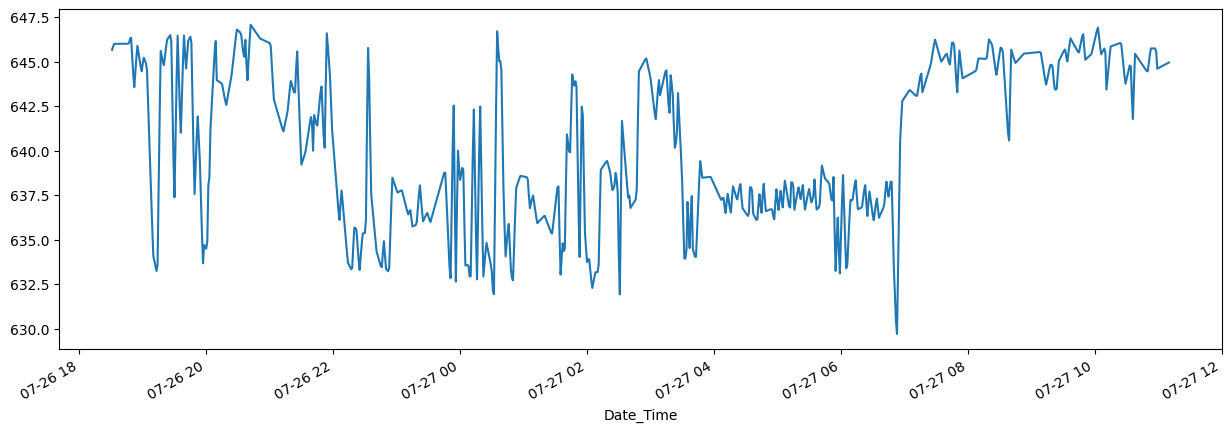

In [78]:
df = pd.read_csv('C3 study_T1.csv', index_col='Date_Time', parse_dates=True)
df[-1000:]["Turb Exhaust T1"].plot(figsize=(15, 5));

In [79]:
df.columns = ['y']
df['ds'] = df.index

In [5]:
df.head()

,y,ds
Date_Time,,
2023-07-21 11:10:14,636.664551,2023-07-21 11:10:14
2023-07-21 11:11:14,637.198364,2023-07-21 11:11:14
2023-07-21 11:12:14,637.648560,2023-07-21 11:12:14
2023-07-21 11:13:14,637.570740,2023-07-21 11:13:14
2023-07-21 11:14:14,637.492920,2023-07-21 11:14:14


In [6]:
df.tail()

,y,ds
Date_Time,,
2023-07-27 11:06:14,644.828918,2023-07-27 11:06:14
2023-07-27 11:07:14,644.860413,2023-07-27 11:07:14
2023-07-27 11:08:14,644.891968,2023-07-27 11:08:14
2023-07-27 11:09:14,644.923523,2023-07-27 11:09:14
2023-07-27 11:10:14,644.955017,2023-07-27 11:10:14


In [125]:
m = Prophet(growth='linear', changepoint_range=0)

In [126]:
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using -1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_pnp3v0c/50bf5_gm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_pnp3v0c/a7c55ty8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67289', 'data', 'file=/tmp/tmp_pnp3v0c/50bf5_gm.json', 'init=/tmp/tmp_pnp3v0c/a7c55ty8.json', 'output', 'file=/tmp/tmp_pnp3v0c/prophet_modelbwpuhff9/prophet_model-20231016143551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:51 - cmdstanpy - INFO - Chain [1] done processing
INFO

In [127]:
future = m.make_future_dataframe(periods=800, freq = '1min')

In [128]:
future.tail()

,ds
9436,2023-07-28 00:26:14
9437,2023-07-28 00:27:14
9438,2023-07-28 00:28:14
9439,2023-07-28 00:29:14
9440,2023-07-28 00:30:14


In [129]:
forecast = m.predict(future)

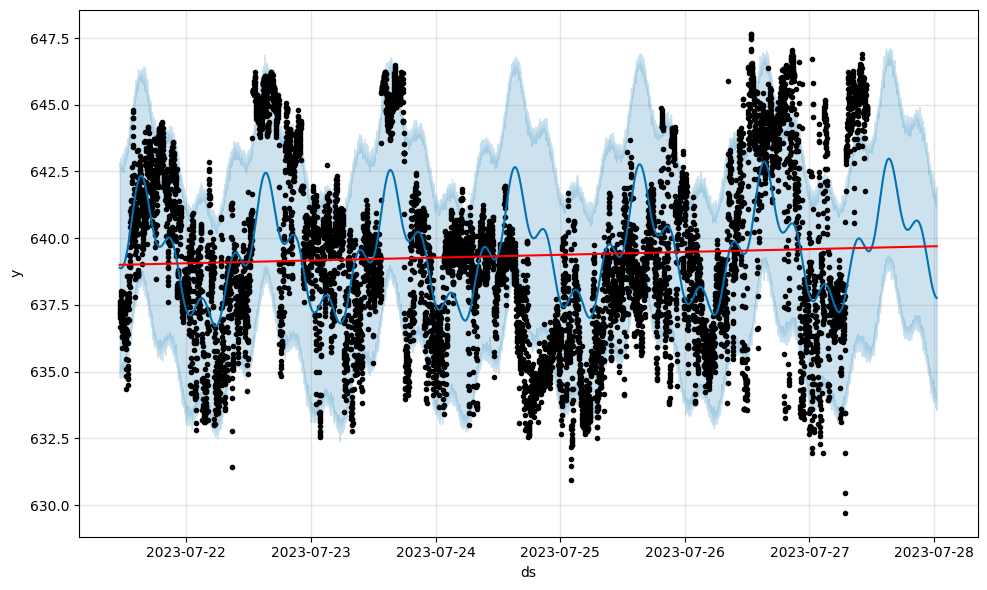

In [130]:
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

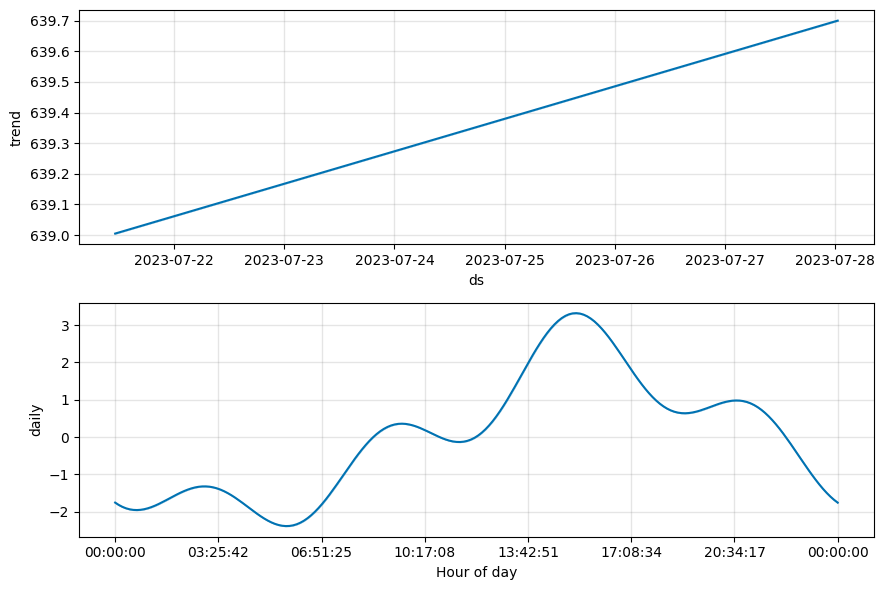

In [131]:
m.plot_components(forecast);

In [179]:
m2 = Prophet()

In [180]:
m2.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_pnp3v0c/lvi5tg_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_pnp3v0c/4oz8ogbz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92675', 'data', 'file=/tmp/tmp_pnp3v0c/lvi5tg_4.json', 'init=/tmp/tmp_pnp3v0c/4oz8ogbz.json', 'output', 'file=/tmp/tmp_pnp3v0c/prophet_modeltqvcbc_6/prophet_model-20231016150950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:09:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [181]:
future = m2.make_future_dataframe(periods=800, freq = '1min')

In [182]:
forecast = m2.predict(future)

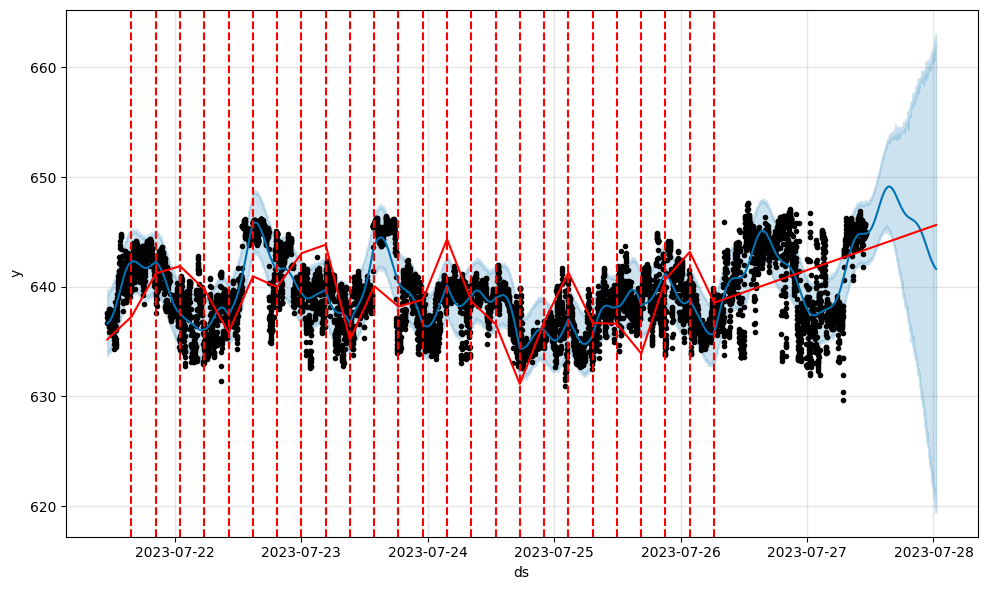

In [183]:
fig = m2.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m2, forecast)

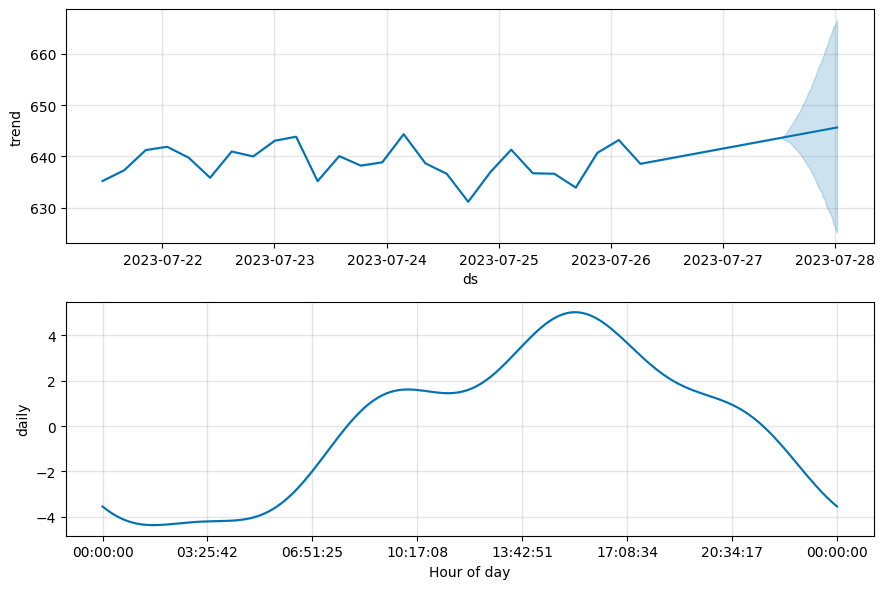

In [163]:
m2.plot_components(forecast);

In [137]:
logdf = df.copy()
logdf['y'] = np.log(logdf['y'])

In [144]:
m3 = Prophet(changepoint_range=0)

In [145]:
m3.fit(logdf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using -1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_pnp3v0c/wde5axzm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_pnp3v0c/nyofo3a1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51444', 'data', 'file=/tmp/tmp_pnp3v0c/wde5axzm.json', 'init=/tmp/tmp_pnp3v0c/nyofo3a1.json', 'output', 'file=/tmp/tmp_pnp3v0c/prophet_modelbzwcjere/prophet_model-20231016143842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:42 - cmdstanpy - INFO - Chain [1] done processing
INFO

In [146]:
future = m3.make_future_dataframe(periods=800, freq = '1min')

In [147]:
forecast = m3.predict(future)

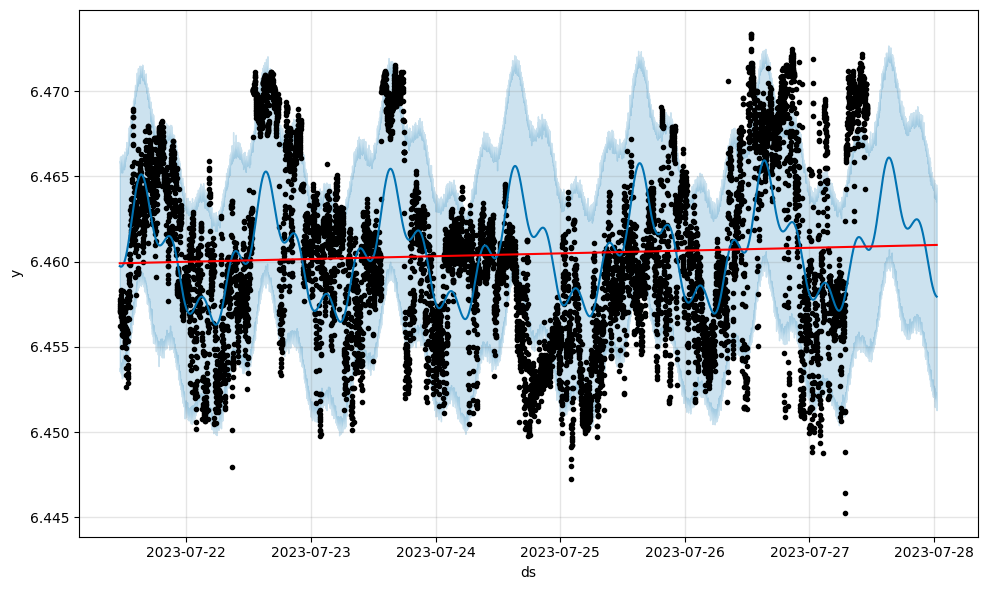

In [148]:
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

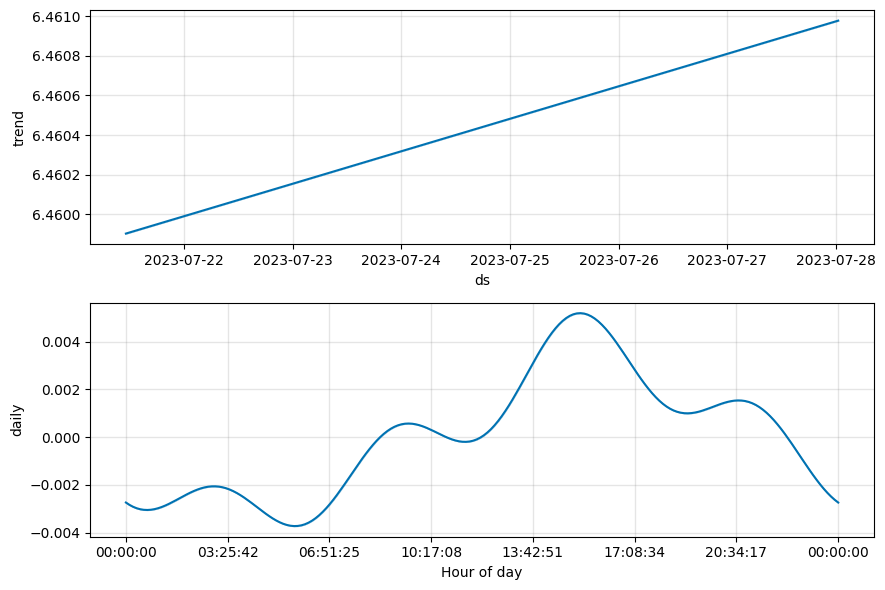

In [149]:
m3.plot_components(forecast);

In [151]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [152]:
m = Prophet()

In [153]:
m.fit(logdf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_pnp3v0c/5vj1kqfo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_pnp3v0c/pd_pl1tt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69685', 'data', 'file=/tmp/tmp_pnp3v0c/5vj1kqfo.json', 'init=/tmp/tmp_pnp3v0c/pd_pl1tt.json', 'output', 'file=/tmp/tmp_pnp3v0c/prophet_modelbjhgb7zc/prophet_model-20231016145303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [154]:
df_cv = cross_validation(
    m,
    initial='360 minutes',
    period='60 minutes',
    horizon='120 minutes')

INFO:prophet:Making 137 forecasts with cutoffs between 2023-07-21 17:10:14 and 2023-07-27 09:10:14


  0%|          | 0/137 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_pnp3v0c/3ozl5zn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_pnp3v0c/qqvox4f2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32371', 'data', 'file=/tmp/tmp_pnp3v0c/3ozl5zn3.json', 'init=/tmp/tmp_pnp3v0c/qqvox4f2.json', 'output', 'file=/tmp/tmp_pnp3v0c/prophet_model8vmp95bt/prophet_model-20231016145312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_pnp3v0c/891ziw4i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_pnp3v0c/ibn52oaz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [155]:
df_cv.head(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-07-21 17:11:14,6.465933,6.463787,6.468043,6.464965,2023-07-21 17:10:14
1,2023-07-21 17:12:14,6.465917,6.463925,6.468065,6.464622,2023-07-21 17:10:14
2,2023-07-21 17:13:14,6.465897,6.463952,6.468051,6.465224,2023-07-21 17:10:14
3,2023-07-21 17:14:14,6.465874,6.463725,6.468041,6.465826,2023-07-21 17:10:14
4,2023-07-21 17:15:14,6.465848,6.463802,6.467905,6.466306,2023-07-21 17:10:14
5,2023-07-21 17:16:14,6.465818,6.463836,6.467985,6.466066,2023-07-21 17:10:14
6,2023-07-21 17:17:14,6.465784,6.463661,6.468077,6.465826,2023-07-21 17:10:14
7,2023-07-21 17:18:14,6.465747,6.463490,6.468012,6.465861,2023-07-21 17:10:14
8,2023-07-21 17:19:14,6.465706,6.463343,6.468087,6.466617,2023-07-21 17:10:14
9,2023-07-21 17:20:14,6.465661,6.463225,6.468237,6.462267,2023-07-21 17:10:14


In [32]:
df_cv.shape

(9960, 6)

In [156]:
from prophet.diagnostics import performance_metrics

In [157]:
pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 00:12:00,0.000017,0.004081,0.002993,0.000463,0.000350,0.000463,0.677616
1,0 days 00:13:00,0.000017,0.004118,0.003038,0.000470,0.000357,0.000470,0.675182
2,0 days 00:14:00,0.000017,0.004160,0.003081,0.000477,0.000361,0.000477,0.672141
3,0 days 00:15:00,0.000018,0.004208,0.003136,0.000485,0.000372,0.000485,0.667883
4,0 days 00:16:00,0.000018,0.004251,0.003188,0.000493,0.000381,0.000493,0.664842
...,...,...,...,...,...,...,...,...
104,0 days 01:56:00,0.000712,0.026674,0.014060,0.002176,0.000972,0.002178,0.439173
105,0 days 01:57:00,0.000734,0.027085,0.014220,0.002201,0.000972,0.002203,0.441606
106,0 days 01:58:00,0.000756,0.027493,0.014384,0.002227,0.000980,0.002229,0.438564
107,0 days 01:59:00,0.000778,0.027901,0.014558,0.002254,0.000997,0.002256,0.434307


In [33]:
naive = df_cv[['ds', 'yhat', 'y', 'cutoff']].copy()

In [34]:
naive_storage = np.zeros(naive.shape[0])
one_day = pd.Timedelta(1, 'minutes')
for i, row in naive.iterrows():
  cutoff = row['cutoff']
  # print(cutoff)

  # must find last cutoff that actually exists in df
  #while cutoff not in df.index:
    #cutoff = cutoff - one_minutes

  naive_storage[i] = df.loc[cutoff]['y']

naive['yhat'] = naive_storage

In [35]:
pm = performance_metrics(df_cv)
pm['smape'].mean()

0.0006301547696412566

In [36]:
naive_metrics = performance_metrics(naive)
naive_metrics['smape'].mean()

1.9599297934814905

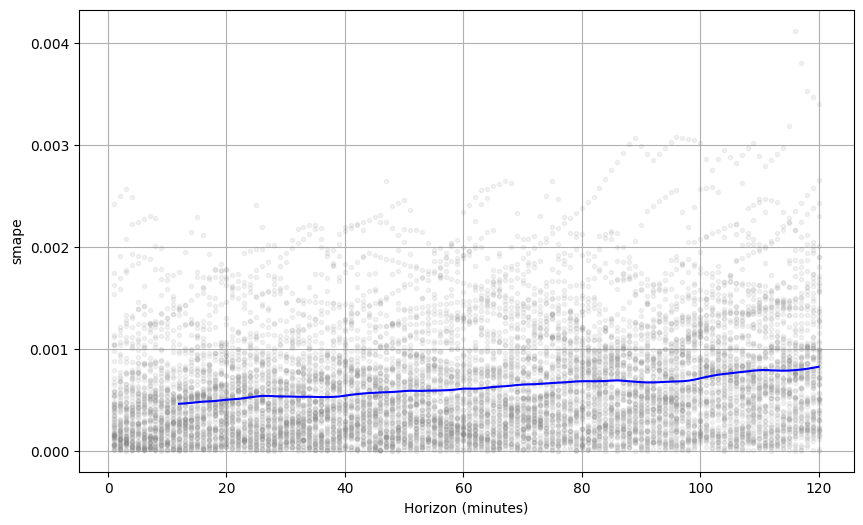

In [37]:
plot_cross_validation_metric(df_cv, metric='smape');